In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import math
from scipy.optimize import curve_fit



In [2]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [3]:
def avalange_gain(distance, gamma):
    gAV = math.exp(gamma*distance)
    return gAV
    

In [4]:
# this calculates gamma as a function of the electric field as for reference [4]
def ionization_coeff(eField, mode=0,drawME=False):
    #lucky model implementation
    fullDots     = pd.read_csv("AlphaFigure.csv",usecols=[0 ,1 ])#, delim_whitespace=True)
    fullTri      = pd.read_csv("AlphaFigure.csv",usecols=[2 ,3 ])#, delim_whitespace=True)
    fullSquares  = pd.read_csv("AlphaFigure.csv",usecols=[4 ,5 ])#, delim_whitespace=True)
    emptyDots    = pd.read_csv("AlphaFigure.csv",usecols=[6 ,7 ])#, delim_whitespace=True)
    emptyTri     = pd.read_csv("AlphaFigure.csv",usecols=[8 ,9 ])#, delim_whitespace=True)
    emptySquares = pd.read_csv("AlphaFigure.csv",usecols=[10,11])#, delim_whitespace=True)
    line         = pd.read_csv("AlphaFigure.csv",usecols=[12,13])#, delim_whitespace=True)

    fullDots     = fullDots     .iloc[1:,:]
    fullTri      = fullTri      .iloc[1:,:]
    fullSquares  = fullSquares  .iloc[1:,:]
    emptyDots    = emptyDots    .iloc[1:,:]
    emptyTri     = emptyTri     .iloc[1:,:]
    emptySquares = emptySquares .iloc[1:,:]
    line         = line         .iloc[1:,:]
    if drawME:
        fig,ax = plt.subplots()
        ax = line  .plot(x="lineX"       ,y="lineY"       , grid=True, label='line' ,logy=True)
        fullTri    .plot(ax=ax, x="FullTriX"    ,y="FullTriY"    , grid=True, label='IS 4  um',linestyle='None',marker="^",logy=True)
        fullDots   .plot(ax=ax, x="FullDotsX"   ,y="FullDotsY"   , grid=True, label='IS 7  um',linestyle='None',marker="o",logy=True)
        fullSquares.plot(ax=ax, x="FullSquaresX",y="FullSquaresY", grid=True, label='IS 33 um',linestyle='None',marker="s",logy=True)
    
        emptyTri    .plot(ax=ax, x="EmptyTriX"    ,y="EmptyTriY"    , grid=True, label='BS 8  um',linestyle='None',marker="^",fillstyle="none",logy=True)
        emptyDots   .plot(ax=ax, x="EmptyDotsX"   ,y="EmptyDotsY"   , grid=True, label='BS 15 um',linestyle='None',marker="o",fillstyle="none",logy=True)
        emptySquares.plot(ax=ax, x="EmptySquaresX",y="EmptySquaresY", grid=True, label='BS 35 um',linestyle='None',marker="s",fillstyle="none",logy=True)
        #line.plot(x="lineX",y="lineY")#,logy=True)
        ax.set_ylabel('Gamma P [1/um]')
        ax.set_xlabel('1/F [um/V]')
    
        fig1,ax1 = plt.subplots()
    x = line["lineX"]
    y = line["lineY"]
    if mode ==0:
        if drawME:
            line.plot(ax = ax1, x="lineX"       ,y="lineY"       , grid=True, label='line' ,logy=True)
    elif mode == 1:
        x = fullTri["FullTriX"].dropna()
        y = fullTri["FullTriY"].dropna()
        if drawME:
            fullTri.plot(ax=ax1, x="FullTriX"    ,y="FullTriY"    , grid=True, label='IS 4  um',linestyle='None',marker="^",logy=True)
    elif mode == 2:
        x = fullDots["FullDotsX"].dropna()
        y = fullDots["FullDotsY"].dropna()
        if drawME:
            fullDots.plot(ax=ax1, x="FullDotsX"    ,y="FullDotsY"    , grid=True, label='IS 7  um',linestyle='None',marker="o",logy=True)
    elif mode == 3:
        x = fullSquares["FullSquaresX"].dropna()
        y = fullSquares["FullSquaresY"].dropna()
        if drawME:
            fullSquares.plot(ax=ax1, x="FullSquaresX"    ,y="FullSquaresY"    , grid=True, label='IS 33  um',linestyle='None',marker="s",logy=True)
    elif mode == 4:
        x = emptyTri["EmptyTriX"].dropna()
        y = emptyTri["EmptyTriY"].dropna()
        if drawME:
            emptyTri.plot(ax=ax1, x="EmptyTriX"    ,y="EmptyTriY"    , grid=True, label='BS 8  um',linestyle='None',marker="^",fillstyle="none",logy=True)
    elif mode == 5:
        x = emptyDots["EmptyDotsX"].dropna()
        y = emptyDots["EmptyDotsY"].dropna()
        if drawME:
            emptyDots.plot(ax=ax1, x="EmptyDotsX"    ,y="EmptyDotsY"    , grid=True, label='BS 15  um',linestyle='None',marker="o",fillstyle="none",logy=True)
    elif mode == 6:
        x = emptySquares["EmptySquaresX"].dropna()
        y = emptySquares["EmptySquaresY"].dropna()
        if drawME:
            emptySquares.plot(ax=ax1, x="EmptySquaresX"    ,y="EmptySquaresY"    , grid=True, label='BS 35  um',linestyle='None',marker="s",fillstyle="none",logy=True)
    else:
        return 0.32
        
    popt, pcov = curve_fit(exp_func, x, y)
    if drawME:
        plt.plot (x, exp_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
        plt.legend()
        ax1.set_ylabel('Gamma P [1/um]')
        ax1.set_xlabel('1/F [um/V]')
    #plt.show()
    gamma = exp_func(1/eField, *popt)
    return gamma

In [5]:
def mobility(time, distance, eField):
    #print("mob: ", distance/(time*eField))
    return distance/(time*eField)
    

In [6]:
def holeCurent(timeH, distance, eField, gamma, time=1):
    mob = mobility(timeH, distance, eField)
    I   = math.exp(gamma*mob*eField*time)
    I   *= 10e9*e*p0*mob*eField/distance# the 10e9 converts to amper
    if time < timeH:
        return I
    else: 
        return 0

In [7]:
def elecCurent(timeE, timeH, distance, eField, gamma,time=1):
    mobE = mobility(timeE, distance, eField)
    mobH = mobility(timeH, distance, eField)
    I   = 1
    if time < timeH:
        I   *= ( math.exp(gamma*mobH*eField*time) - math.exp(gamma*mobE*eField*time) )
    elif (time < timeE):
        I   *= ( math.exp(gamma*distance) - math.exp(gamma*mobE*eField*time) )
    else:
        return 0
    I   *= 10e9*e*n0*mobE*eField/distance # the 10e9 converts to amper
    return I

In [16]:
F      = 100 # Electric Field [V/um]
FAV    = 100 # Electric Field threshold for Avalanche Multiplication [V/um]
d      = 35#4  # A-Se distance between electrons [typically in units of um]
RIL    = 1 #Resistive Interface Layer
e      = 1.6e-19 #elementary charge in Coulomb
gammaP = 0.3#ionization_coeff(F,4) # default 0.32 hole impact ionization coefficient [1/um]
n0     = 1000 #number of electrons created by the light source
p0     = 1000 #number of holes created by the light source
te     = 45 #electrons transit time [ns]
th     = 2.5  #holes transit time [ns]


0.19082741848272003

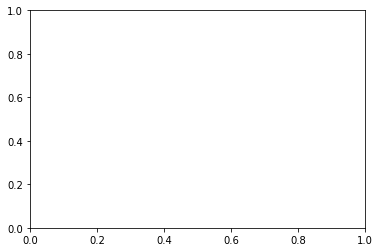

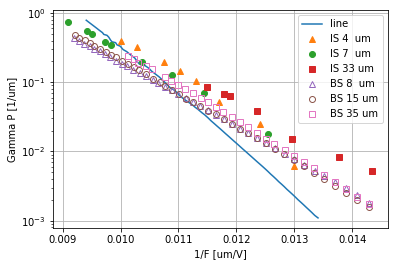

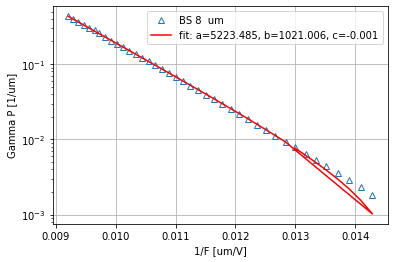

In [17]:
ionization_coeff(F,4,True)

In [18]:
t2  = np.linspace(0,45,90)

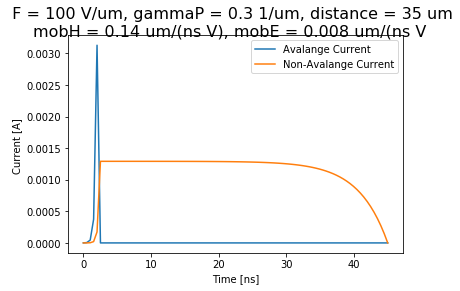

In [20]:
fh = np.vectorize(holeCurent)
fe = np.vectorize(elecCurent)
mobH = mobility(th, d, F)
mobE = mobility(te, d, F)
mobES = "{:.3f}".format(mobE)
fig,  ax2  = plt.subplots()
title =  " F = "+str(F)+" V/um, gammaP = "+str(gammaP)+" 1/um, distance = "+str(d)+" um\n"+"mobH = "+str(mobH)+" um/(ns V), mobE = "+str(mobES)+" um/(ns V)"
fig.suptitle(title, fontsize=16)
ax2.set_ylabel("Current [A] ")
ax2.set_xlabel("Time [ns]")
ax2.plot(t2 , fh(   th,d,F,gammaP,t2) , label='Avalange Current')
ax2.plot(t2 , fe(te,th,d,F,gammaP,t2) , label='Non-Avalange Current')
#ax2.set_xlim(18000,26000)
ax2.legend()

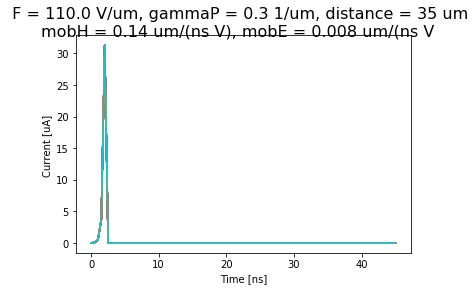

In [14]:
valEFieldRange = np.linspace(70,110,40) #Field Range
t3             = np.linspace(0,5)       # Time Range

dicMaxI = {}
fig,  ax2  = plt.subplots()
ax2.set_ylabel("Current [uA] ")
ax2.set_xlabel("Time [ns]")

for F in valEFieldRange:
    title =  " F = "+str(F)+" V/um, gammaP = "+str(gammaP)+" 1/um, distance = "+str(d)+" um\n"+"mobH = "+str(mobH)+" um/(ns V), mobE = "+str(mobES)+" um/(ns V"
    fig.suptitle(title, fontsize=16)
    ax2.plot(t2 , 10e6*fh(   th,d,F,gammaP,t2) , label='Avalange Current')
    #ax2.plot(t2 , 10e6*fe(te,th,d,F,gammaP,t2) , label='Non-Avalange Current')
    #ax2.set_xlim(18000,26000)
    #ax2.legend()

